# Simplest example
## XOR gate
The XOR gate is a function of two variables that returns one output:
$$\begin{array}{cc|c}
x_1 & x_2 & y \\ \hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}$$

### Import the relevant libraries

In [1]:
import numpy as np   # to deal with arrays, vectors, matrices...
import matplotlib.pyplot as plt   # to plot the data
# TensorFlow and tf.keras
import tensorflow as tf  # TensorFlow library
from tensorflow import keras  # Keras module

### Get the data
In this case we create it manually

In [2]:
# Replicate the XOR behavior
IN_train = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

OUT_train = np.array([[0],
                      [1],
                      [1],
                      [0]])

There is no test data, since the inuputs are constrained to $\{0,1\}$. We use the training set as testing

In [3]:
IN_test = IN_train
OUT_test = OUT_train

### Create the NN
keras.Sequential is the class used to create MLP  
keras.layers.Dense is the standard layer, and sigmoid the standard activation.  
The sizes of these layers are:
    $$input\times layer_1 \quad;\quad layer_1\times output$$

It is useful to play a bit with this part, try different architectures, activations... for instance:  

- input --> 2 --> 1 --> output is much harder to converge  
- input --> 200 --> 500 --> 1000 --> 100 --> 1 --> output is much slower to train

In [4]:
model = keras.Sequential([
        keras.layers.Dense(3, activation=tf.nn.sigmoid, input_shape=(2,)),
        keras.layers.Dense(1, activation=None) ])

Compile the model and check that everything is ok.  
optimizer: method to follow the gradient descent.  
loss: error function to use.  
metrics: statistics to keep in order to monitor the training process.

In [5]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

We can test now our model, initialized with random parameters:

In [6]:
print('Before training:')
print('Input   xpct Out   Output')
#
# We use the "predict" method to evaluate the model in the training dataset
#
predicted = model.predict(IN_train)

for i in range(IN_train.shape[0]):
   print(IN_train[i],'   ',OUT_train[i],'      %.2f'%(predicted[i]))

Before training:
Input   xpct Out   Output
[0 0]     [0]       -1.71
[0 1]     [1]       -1.70
[1 0]     [1]       -1.34
[1 1]     [0]       -1.35


### Training the model
The training process is carried out by the "fit" method.  
epochs: Number of steps towards the error minimum  
validation_data: If available, it is the dataset against which the accuracy is measured  
verbose: 0 run quietly, no output

In [10]:
# Train the model
from time import time
t_old = time()
history = model.fit(IN_train, OUT_train, epochs=5000,
                    validation_data = (IN_test,OUT_test),
                    verbose=0)
print('Training: %ss'%(time()-t_old))

Training: 11.751383066177368s


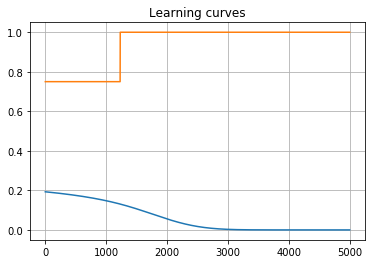

In [11]:
# plot learning curve
err = history.history['loss']
acc = history.history['accuracy']

fig, ax = plt.subplots()
ax.plot(err,label='loss')
ax.plot(acc,label='accuracy')
ax.set_title('Learning curves')
plt.show()

We can test now our model, with the optimized parameters

In [12]:
print('After training:')
print('Input   xpct Out   Output')
predicted = model.predict(IN_train)
for i in range(IN_train.shape[0]):
   print(IN_train[i],'   ',OUT_train[i],'      %.2f'%(predicted[i]))

After training:
Input   xpct Out   Output
[0 0]     [0]       0.00
[0 1]     [1]       1.00
[1 0]     [1]       1.00
[1 1]     [0]       0.00


## How to save and load models

In [13]:
# Save result
model.save('my_model.h5')

In [14]:
model_loaded = keras.models.load_model('my_model.h5')
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
